In [3]:
!pip install nemo_toolkit[asr] 

  Using cached nemo_toolkit-1.23.0-py3-none-any.whl.metadata (18 kB)
  Using cached triton-3.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.3 kB)
  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py) ... done
  Using cached braceexpand-0.1.7-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached jiwer-3.0.4-py3-none-any.whl.metadata (2.6 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━

In [4]:
!pip install datasets transformers librosa jiwer git-lfs accelerate torch num2words soundfile tqdm audiomentations

  Using cached git_lfs-1.6-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached audiomentations-0.37.0-py3-none-any.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 44.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you hav

In [16]:
import pandas as pd

# Paths to the CSV files
csv_file1 = '/kaggle/input/tele-vi/annoted/metadata.csv'
csv_file2 = '/kaggle/input/tele-vi/notannoted/metadata.csv'

# Read both CSV files
data1 = pd.read_csv(csv_file1)
data2 = pd.read_csv(csv_file2)

# Concatenate the dataframes
merged_data = pd.concat([data1, data2], ignore_index=True)

# Save the merged dataframe to a new CSV file
merged_data.to_csv('/kaggle/working/metadata.csv', index=False)

print("Merged CSV file saved successfully.")

Merged CSV file saved successfully.


In [30]:
import pandas as pd
import os
import json
import tqdm

# Paths and directories
csv_file_path = '/kaggle/working/metadata.csv'  # Adjust this path accordingly
output_base_dir = '/kaggle/working/'

# Read the CSV file
data = pd.read_csv(csv_file_path)

# Split dataset into train, validation, test (80-10-10 split)
train_split = data.sample(frac=0.8, random_state=42)
remaining_data = data.drop(train_split.index)

# Chia đều 10% cho validation và 10% cho test
val_split = remaining_data.sample(frac=0.5, random_state=42)
test_split = remaining_data.drop(val_split.index)

# Define splits and corresponding file names
splits = {
    'train': train_split,
    'validation': val_split,
    'test': test_split
}

# Loop through each split and save JSON manifest
for split_name, split_data in splits.items():
    json_file = os.path.join(output_base_dir, f'{split_name}_manifest.json')

    # Create and open the JSON manifest file
    with open(json_file, 'w', encoding='utf8') as jf:
        # Loop through dataset split and write metadata to JSON
        for index, row in tqdm.tqdm(split_data.iterrows(), total=len(split_data)):
            path = row['file']
            text = row["text"]
            duration = row["duration"]
            
            # Write metadata to JSON
            manifest_item = {
                "audio_filepath": path,  
                "duration": duration,
                "text": text
            }
            json.dump(manifest_item, jf, ensure_ascii=False)
            jf.write('\n')  # Write newline character after each JSON object

print("Dataset split and manifest files created successfully.")


100%|██████████| 1199/1199 [00:00<00:00, 11007.18it/s]

Dataset split and manifest files created successfully.


In [33]:
# Đọc file CSV
csv_file_path = '/kaggle/working/metadata.csv'
data = pd.read_csv(csv_file_path)

# Split lại dữ liệu thành các tập train, validation, test nếu cần thiết
# Ở đây giả định các tập đã được tạo sẵn như trong đoạn mã trước
# Nếu chưa chia lại, dùng lại train_split, val_split, test_split từ đoạn mã trên

# Tính tổng thời lượng từng tập dữ liệu theo giờ
train_duration_hours = train_split['duration'].sum() / 3600  # Chuyển đổi từ giây sang giờ
val_duration_hours = val_split['duration'].sum() / 3600
test_duration_hours = test_split['duration'].sum() / 3600

print(f"Tổng thời lượng của tập train: {train_duration_hours:.2f} giờ")
print(f"Tổng thời lượng của tập validation: {val_duration_hours:.2f} giờ")
print(f"Tổng thời lượng của tập test: {test_duration_hours:.2f} giờ")

Tổng thời lượng của tập train: 7.35 giờ
Tổng thời lượng của tập validation: 0.89 giờ
Tổng thời lượng của tập test: 0.91 giờ


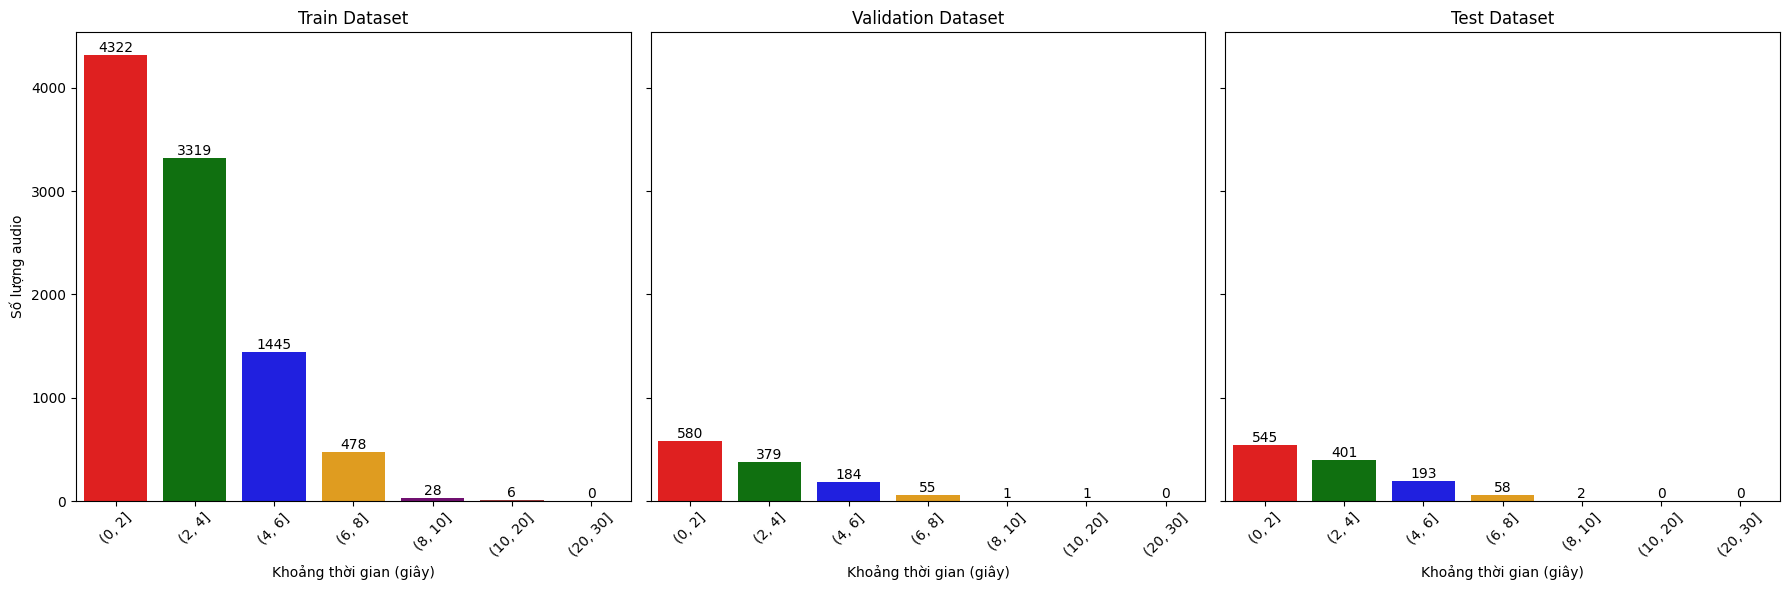

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file CSV
csv_file_path = '/kaggle/working/metadata.csv'
data = pd.read_csv(csv_file_path)

# Phân chia các khoảng duration cho từng tập dữ liệu
bins = [0, 2, 4, 6, 8, 10, 20, 30]  # Các khoảng thời gian

# Phân loại duration cho từng tập
train_split['duration_bins'] = pd.cut(train_split['duration'], bins)
val_split['duration_bins'] = pd.cut(val_split['duration'], bins)
test_split['duration_bins'] = pd.cut(test_split['duration'], bins)

# Đếm số lượng audio trong mỗi khoảng duration
train_duration_counts = train_split['duration_bins'].value_counts().sort_index()
val_duration_counts = val_split['duration_bins'].value_counts().sort_index()
test_duration_counts = test_split['duration_bins'].value_counts().sort_index()

# Tạo bảng màu cơ bản
basic_colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']

# Vẽ đồ thị cột cho từng tập dữ liệu
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Biểu đồ tập train
sns.barplot(ax=axes[0], x=train_duration_counts.index.astype(str), y=train_duration_counts.values, palette=basic_colors)
axes[0].set_title('Train Dataset')
axes[0].set_xlabel('Khoảng thời gian (giây)')
axes[0].set_ylabel('Số lượng audio')
axes[0].tick_params(axis='x', rotation=45)

# Hiển thị giá trị lên cột cho train
for i, value in enumerate(train_duration_counts.values):
    axes[0].text(i, value + 0.5, str(value), ha='center', va='bottom')

# Biểu đồ tập validation
sns.barplot(ax=axes[1], x=val_duration_counts.index.astype(str), y=val_duration_counts.values, palette=basic_colors)
axes[1].set_title('Validation Dataset')
axes[1].set_xlabel('Khoảng thời gian (giây)')
axes[1].tick_params(axis='x', rotation=45)

# Hiển thị giá trị lên cột cho validation
for i, value in enumerate(val_duration_counts.values):
    axes[1].text(i, value + 0.5, str(value), ha='center', va='bottom')

# Biểu đồ tập test
sns.barplot(ax=axes[2], x=test_duration_counts.index.astype(str), y=test_duration_counts.values, palette=basic_colors)
axes[2].set_title('Test Dataset')
axes[2].set_xlabel('Khoảng thời gian (giây)')
axes[2].tick_params(axis='x', rotation=45)

# Hiển thị giá trị lên cột cho test
for i, value in enumerate(test_duration_counts.values):
    axes[2].text(i, value + 0.5, str(value), ha='center', va='bottom')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import textwrap

def create_transcript_from_csv(csv_file, output_file):
    all_transcripts = []

    # Read the CSV file and collect the text data
    data = pd.read_csv(csv_file)
    for text in data['text']:
        if isinstance(text, str):
            all_transcripts.append(text)
        elif pd.isna(text):
            continue
        else:
            all_transcripts.append(str(text))

    # Join all text segments with a space
    combined_transcript = " ".join(all_transcripts)

    # Split the combined transcript into lines of no more than 40 characters
    wrapped_lines = textwrap.wrap(combined_transcript, width=40)

    # Write the lines to the output file
    with open(output_file, 'w', encoding='utf-8') as f:
        for line in wrapped_lines:
            f.write(line + "\n")

# Define the path to the CSV file
csv_file_path = '/kaggle/working/metadata.csv'

# Call the function to create the transcript file
create_transcript_from_csv(csv_file_path, "transcript_all.json")

print("Transcript file created successfully.")

In [11]:
import os

# Create the directory
os.makedirs('/kaggle/working/Fast-Conformer/hparam', exist_ok=True)
os.makedirs('/kaggle/working/Fast-Conformer/dict_N', exist_ok=True)

print("Created successfully.")


Created successfully.


In [12]:
!wget https://raw.githubusercontent.com/ThienKym123/Fast-Conformer/main/process_asr_text_tokenizer.py -O /kaggle/working/Fast-Conformer/process_asr_text_tokenizer.py
!wget https://raw.githubusercontent.com/ThienKym123/Fast-Conformer/main/hparam/fast-conformer_ctc_bpe.yaml -O /kaggle/working/Fast-Conformer/hparam/fast-conformer_ctc_bpe.yaml
!wget https://raw.githubusercontent.com/ThienKym123/Fast-Conformer/main/speech_to_text_ctc_bpe.py -O /kaggle/working/Fast-Conformer/speech_to_text_ctc_bpe.py

--2024-09-12 14:50:50--  https://raw.githubusercontent.com/ThienKym123/Fast-Conformer/main/process_asr_text_tokenizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9132 (8.9K) [text/plain]
Saving to: '/kaggle/working/Fast-Conformer/process_asr_text_tokenizer.py'

/kaggle/working/Fas 100%[===================>]   8.92K  --.-KB/s    in 0s      

2024-09-12 14:50:50 (64.3 MB/s) - '/kaggle/working/Fast-Conformer/process_asr_text_tokenizer.py' saved [9132/9132]

--2024-09-12 14:50:51--  https://raw.githubusercontent.com/ThienKym123/Fast-Conformer/main/hparam/fast-conformer_ctc_bpe.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubuse

In [13]:
!python /kaggle/working/Fast-Conformer/process_asr_text_tokenizer.py\
        --data_file="/kaggle/working/transcript_all.json" \
        --data_root="/kaggle/working/Fast-Conformer/dict_N" \
        --vocab_size=1024 \
        --tokenizer="spe" \
        --no_lower_case \
        --spe_type="bpe" \
        --spe_character_coverage=1.0 \
        --log

Traceback (most recent call last):
  File "/kaggle/working/Fast-Conformer/process_asr_text_tokenizer.py", line 10, in <module>
    from nemo.collections.common.tokenizers.sentencepiece_tokenizer import create_spt_model
  File "/opt/conda/lib/python3.10/site-packages/nemo/collections/common/__init__.py", line 16, in <module>
    from nemo.collections.common import data, losses, parts, tokenizers
  File "/opt/conda/lib/python3.10/site-packages/nemo/collections/common/losses/__init__.py", line 15, in <module>
    from nemo.collections.common.losses.aggregator import AggregatorLoss
  File "/opt/conda/lib/python3.10/site-packages/nemo/collections/common/losses/aggregator.py", line 19, in <module>
    from nemo.core.classes import Loss, typecheck
  File "/opt/conda/lib/python3.10/site-packages/nemo/core/__init__.py", line 16, in <module>
    from nemo.core.classes import *
  File "/opt/conda/lib/python3.10/site-packages/nemo/core/classes/__init__.py", line 20, in <module>
    from nemo.core.

In [14]:
!wandb login edfa6bb2b01b5b2e74dd9f112d7ba0da853ebd0e

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [15]:
!HYDRA_FULL_ERROR=1 python /kaggle/working/Fast-Conformer/speech_to_text_ctc_bpe.py --config-path="/kaggle/working/Fast-Conformer/hparam"

Traceback (most recent call last):
  File "/kaggle/working/Fast-Conformer/speech_to_text_ctc_bpe.py", line 3, in <module>
    import nemo.collections.asr as nemo_asr
  File "/opt/conda/lib/python3.10/site-packages/nemo/collections/asr/__init__.py", line 15, in <module>
    from nemo.collections.asr import data, losses, models, modules
  File "/opt/conda/lib/python3.10/site-packages/nemo/collections/asr/losses/__init__.py", line 15, in <module>
    from nemo.collections.asr.losses.angularloss import AngularSoftmaxLoss
  File "/opt/conda/lib/python3.10/site-packages/nemo/collections/asr/losses/angularloss.py", line 18, in <module>
    from nemo.core.classes import Loss, Typing, typecheck
  File "/opt/conda/lib/python3.10/site-packages/nemo/core/__init__.py", line 16, in <module>
    from nemo.core.classes import *
  File "/opt/conda/lib/python3.10/site-packages/nemo/core/classes/__init__.py", line 20, in <module>
    from nemo.core.classes.common import (
  File "/opt/conda/lib/python3.1